## Titanic Dataset – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis (EDA) on the Titanic dataset to understand key factors influencing passenger survival. .

In [43]:
# Add the project root directory to Python's module search path.
# This allows the notebook to import shared ML modules (e.g., feature_engineering) even though the notebook is located in a subfolder.

import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parents[1]))

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ML.feature_engineering import engineer_features

In [45]:
# Data Loading
train_data = pd.read_csv(r'../../Data/train.csv')

### EDA 1 - Survival by Sex

Initial Data Overview

In [46]:
train_data.shape

(891, 12)

In [47]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [49]:
train_data['Survived'].unique()

array([0, 1])

In [50]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [52]:
#checking for missing values
train_data['Sex'].isna().sum()

np.int64(0)

In [53]:
#checking for missing values
train_data['Survived'].isna().sum()

np.int64(0)

**Observation:**  
The `Sex` column contains two categories (`male`, `female`) and has no missing values. The `Survived` column contains two categories (`0`, `1`), where 0 - indicates non-survival, 1 -  indicates survival. The `Survived` column has no missing values. No inconsistencies were observed, so the feature is ready for analysis.

In [54]:
# Calculate survival rate by sex
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()

print(survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Visualization

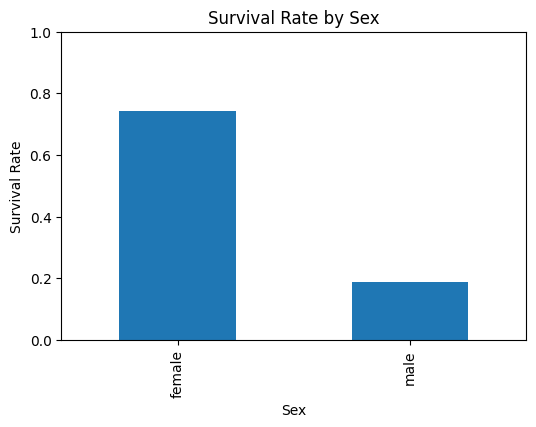

In [55]:
# Plot
plt.figure(figsize=(6, 4))
survival_by_sex.plot(kind='bar')

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)
plt.show()

**Summary:**  
The visualization shows a substantial difference in survival rates between genders. Female passengers had a significantly higher survival rate than male passengers, which aligns with the historical “women and children first” evacuation policy. This indicates that `Sex` is a strong predictor of survival.


### EDA 2 - Survival by Passenger Class

Initial Data Overview

In [56]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [57]:
train_data['Pclass'].isna().sum()

np.int64(0)

In [58]:
train_data['Pclass'].unique()

array([3, 1, 2])

**Observation:**  
The `Pclass` column contains 3 categories: 1, 2 and 3 and has no missing values. No inconsistencies were observed, so the feature is ready for analysis.

In [59]:
# Calculate survival rate by class
survival_by_pclass = train_data.groupby('Pclass')['Survived'].mean()

print(survival_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Visualization

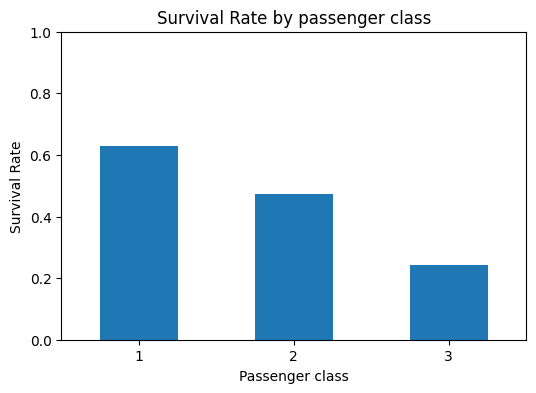

In [60]:
# Plot
plt.figure(figsize=(6, 4))
survival_by_pclass.plot(kind='bar')

plt.title('Survival Rate by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

**Observation:**  
The visualization shows that passengers in 1st class had the highest survival rate, followed by 2nd and 3rd class. This indicates that passenger class was an important factor in survival probability.


### EDA 3 - Survival by Age

Initial Data Overview

In [61]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [62]:
train_data['Age'].isna().sum()

np.int64(177)

In [63]:
# Removing from the general list the lines where Age data is missing
data_age = train_data.dropna(subset = ['Age'])

In [64]:
# Checking that there is no missing data in the Age column
data_age['Age'].isna().sum()

np.int64(0)

### Visualization

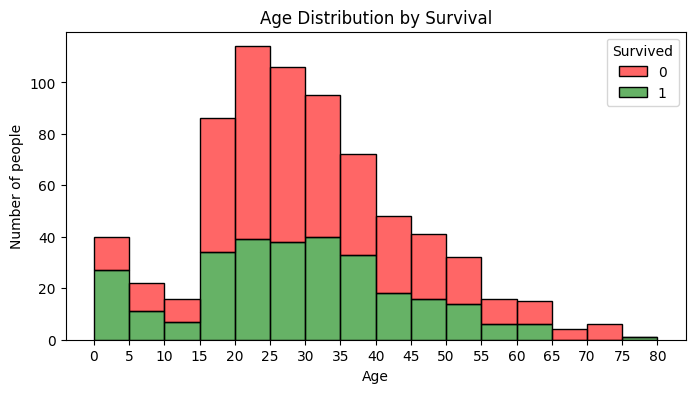

In [65]:
plt.figure(figsize=(8,4))

# Find the maximum age
max_age = int(data_age['Age'].max())  

# Creating a histplot
sns.histplot(
    data=data_age, 
    x='Age', 
    hue='Survived', 
    bins=range(0, max_age+5, 5),   # step 5 year
    palette=['red','green'], 
    alpha=0.6,
    multiple='stack'  # display both survivors and dead in one column
)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of people')

# Detailed ticks by X, from 0 to maximum age in increments of 5
plt.xticks(range(0, max_age+5, 5))

plt.show()

### Summary:
Younger passengers (0–10 years old) had a higher survival rate, while most passengers aged 15–50 did not survive. The oldest surviving passenger was 80 years old — no one older than 65 survived except them — and the youngest was only a few months old. Age appears to be an important factor in predicting survival.

## Feature Engineering for EDA

Apply shared feature engineering pipeline so that all visualizations use the same engineered features as the ML model.

This ensures consistency between:
 - exploratory analysis
 - model training
 - inference pipeline

In [66]:
train_data = engineer_features(train_data)

### EDA 4 - Survival by AgeGroup

In [67]:
train_data[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,22.0,YoungAdult
1,38.0,Adult
2,26.0,YoungAdult
3,35.0,YoungAdult
4,35.0,YoungAdult


Survival rate by Age Group :

In [68]:
# Creating Age Group Bins

bins = [0, 12, 18, 35, 60, 100]

survival_by_agegroup = train_data.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)

AgeGroup
Child         0.579710
Teen          0.428571
YoungAdult    0.382682
Adult         0.400000
Senior        0.227273
Name: Survived, dtype: float64


C:\Users\Yevheniia\AppData\Local\Temp\ipykernel_17440\739756525.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = train_data.groupby('AgeGroup')['Survived'].mean()


### Visualization

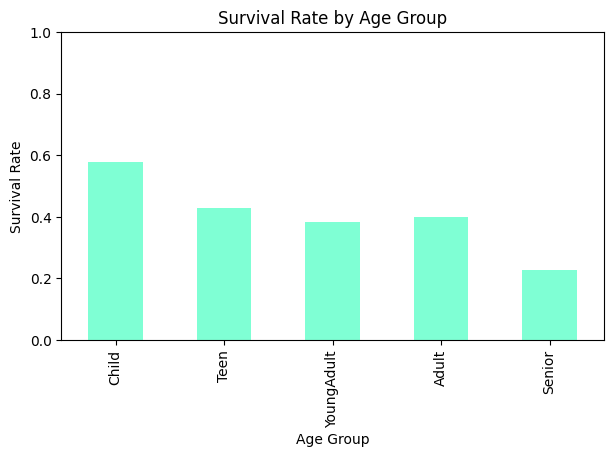

In [69]:
plt.figure(figsize=(7,4))
survival_by_agegroup.plot(kind='bar', color='aquamarine')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

***Observation:***

Children (0–12) had the highest survival rate, followed by Teen. Seniors (60+) had the lowest survival. 
This supports the “women and children first” evacuation policy, showing that age was a strong factor in survival.

### EDA 5 – Survival by FareGroup

In [70]:
# Fare Groups
fare_labels = ['Low', 'Medium', 'High', 'VeryHigh']
train_data = engineer_features(train_data)

# Calculate survival rate by FareGroup
survival_by_faregroup = train_data.groupby('FareGroup')['Survived'].mean()
print(survival_by_faregroup)

FareGroup
Low         0.197309
Mid         0.303571
High        0.454955
VeryHigh    0.581081
Name: Survived, dtype: float64


C:\Users\Yevheniia\AppData\Local\Temp\ipykernel_17440\4051185757.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_faregroup = train_data.groupby('FareGroup')['Survived'].mean()


### Visualization

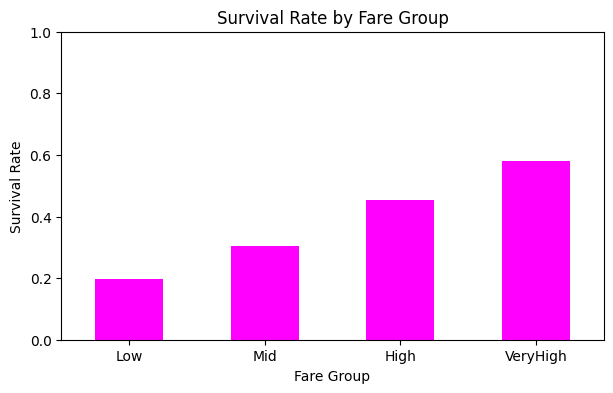

In [71]:
plt.figure(figsize=(7,4))
survival_by_faregroup.plot(kind='bar', color='fuchsia')                     
plt.title('Survival Rate by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()


***Observation:***
Passengers who paid higher fares had higher survival rates, while those in the low fare group had the lowest survival. 

### EDA 6 Survival by Family Size / IsAlone :

In [72]:
train_data[['FamilySize', 'IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


C:\Users\Yevheniia\AppData\Local\Temp\ipykernel_17440\3010563474.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


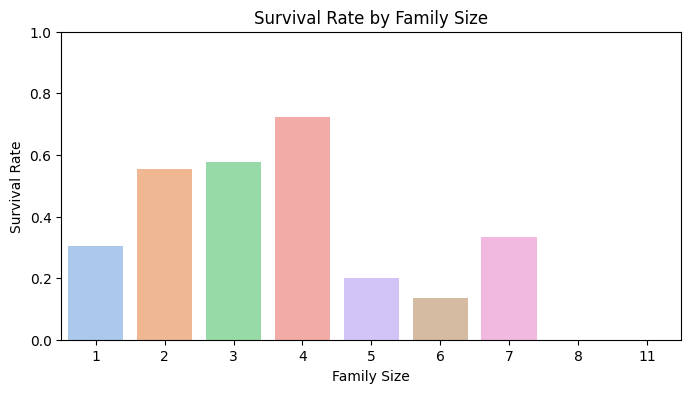

In [73]:
survival_by_familysize = train_data.groupby('FamilySize')['Survived'].mean()
print(survival_by_familysize)

plt.figure(figsize=(8,4))
sns.barplot(
    x=survival_by_familysize.index,
    y=survival_by_familysize.values,
    palette='pastel'
)

plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()


***Observation:***
Passengers traveling with family had a higher survival rate compared to those traveling alone. Survival tends to be highest for small family sizes, while very large families show lower survival probabilities. This suggests that family presence played a role during evacuation and makes FamilySize and IsAlone useful features for predictive modeling.